<a href="https://colab.research.google.com/github/ProfessorMB21/NumericalMethodsWithPython/blob/main/Homework1_Numerical_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import sympy as sp
from sympy import symbols, exp, sin, cos, log, sinh, cosh, pi, sqrt
import matplotlib.pyplot as plt

# Define the function and parameters
x = symbols('x')
f = exp(x) + sin((x + 2)/2)
a, b = -1, 0
control_points = [-0.29, -0.42, -0.76]

print("=" * 70)
print("INTERPOLATION METHODS")
print("=" * 70)
print(f"Function: f(x) = {f}")
print(f"Interval: [{a}, {b}]")
print(f"Control points: {control_points}")
print()

# =========================================================================
# PROBLEM 1: LAGRANGE INTERPOLATION L5(f, x)
# =========================================================================
print("=" * 70)
print("PROBLEM 1: LAGRANGE INTERPOLATION L5(f, x)")
print("=" * 70)

def lagrange_basis(x, nodes, i):
    """Calculate i-th Lagrange basis polynomial"""
    basis = 1
    for j in range(len(nodes)):
        if j != i:
            basis *= (x - nodes[j]) / (nodes[i] - nodes[j])
    return basis

def lagrange_polynomial(x, nodes, func):
    """Construct Lagrange interpolation polynomial"""
    poly = 0
    for i in range(len(nodes)):
        poly += func.subs('x', nodes[i]) * lagrange_basis(x, nodes, i)
    return poly

# Set 1: Equidistant nodes
print("\n--- Set 1: Equidistant Nodes ---")
nodes_equidistant = [a + k*(b-a)/4 for k in range(5)]
print(f"Nodes: {[float(node) for node in nodes_equidistant]}")

L5_equidistant = lagrange_polynomial(x, nodes_equidistant, f)
print(f"Lagrange polynomial L5(x) = {sp.simplify(L5_equidistant)}")

# Set 2: Chebyshev-like nodes
print("\n--- Set 2: Chebyshev-like Nodes ---")
nodes_chebyshev = [(b-a)/2 * sp.cos((2*k-1)*sp.pi/10) + (a+b)/2 for k in range(1, 6)]
nodes_chebyshev = sorted([float(node) for node in nodes_chebyshev])
print(f"Nodes: {nodes_chebyshev}")

L5_chebyshev = lagrange_polynomial(x, nodes_chebyshev, f)
print(f"Lagrange polynomial L5(x) = {sp.simplify(L5_chebyshev)}")

# Evaluate at control points and compute errors
print("\n--- Error Analysis at Control Points ---")
print("Control Point | f(x) \t| L5_equidistant | L5_chebyshev | Error_equidistant | Error_chebyshev")
print("-" * 95)

for cp in control_points:
    f_val = float(f.subs(x, cp))
    L5_eq_val = float(L5_equidistant.subs(x, cp))
    L5_ch_val = float(L5_chebyshev.subs(x, cp))

    error_eq = abs(f_val - L5_eq_val)
    error_ch = abs(f_val - L5_ch_val)

    print(f"{cp:13.2f} | {f_val:8.6f} | {L5_eq_val:15.6f} | {L5_ch_val:13.6f} | "
          f"{error_eq:17.6f} | {error_ch:15.6f}")

INTERPOLATION METHODS
Function: f(x) = exp(x) + sin(x/2 + 1)
Interval: [-1, 0]
Control points: [-0.29, -0.42, -0.76]

PROBLEM 1: LAGRANGE INTERPOLATION L5(f, x)

--- Set 1: Equidistant Nodes ---
Nodes: [-1.0, -0.75, -0.5, -0.25, 0.0]
Lagrange polynomial L5(x) = -8.94838342148461*x**4 + 10.6666666666667*x**4*sin(1) - 22.2971183044495*x**3 + 26.6666666666667*x**3*sin(1) - 19.2440741884688*x**2 + 23.3333333333333*x**2*sin(1) - 5.74264428527953*x + 8.33333333333333*x*sin(1) + 1.0*sin(1) + 1.0

--- Set 2: Chebyshev-like Nodes ---
Nodes: [-0.9755282581475768, -0.7938926261462366, -0.5, -0.20610737385376343, -0.024471741852423214]
Lagrange polynomial L5(x) = 0.0273070237046866*x**4 + 0.142107368471343*x**3 + 0.390244745249376*x**2 + 1.26958965399581*x + 1.8414597924989

--- Error Analysis at Control Points ---
Control Point | f(x) 	| L5_equidistant | L5_chebyshev | Error_equidistant | Error_chebyshev
---------------------------------------------------------------------------------------------

In [5]:
# =========================================================================
# PROBLEM 2: NEWTON INTERPOLATION POLYNOMIAL
# =========================================================================
print("\n" + "=" * 70)
print("PROBLEM 2: NEWTON INTERPOLATION POLYNOMIAL")
print("=" * 70)

def divided_differences(nodes, func):
    """Calculate divided differences table"""
    n = len(nodes)
    # Initialize table
    table = np.zeros((n, n))

    # Fill first column with function values
    for i in range(n):
        table[i, 0] = float(func.subs(x, nodes[i]))

    # Calculate divided differences
    for j in range(1, n):
        for i in range(n - j):
            table[i, j] = (table[i+1, j-1] - table[i, j-1]) / (nodes[i+j] - nodes[i])

    return table

def newton_polynomial(x, nodes, func):
    """Construct Newton interpolation polynomial"""
    table = divided_differences(nodes, func)
    n = len(nodes)

    poly = table[0, 0]  # f[x0]
    product = 1

    for i in range(1, n):
        product *= (x - nodes[i-1])
        poly += table[0, i] * product

    return poly

# Use equidistant nodes for Newton interpolation
print("Using equidistant nodes for Newton interpolation:")
print(f"Nodes: {[float(node) for node in nodes_equidistant]}")

newton_poly = newton_polynomial(x, nodes_equidistant, f)
print(f"Newton polynomial: {sp.simplify(newton_poly)}")

# Verify Newton polynomial equals Lagrange polynomial
verification_points = [-0.8, -0.5, -0.2]
print("\nVerification (should be equal to Lagrange):")
print("Point | Lagrange | Newton | Difference")
print("-" * 45)
for point in verification_points:
    lagrange_val = float(L5_equidistant.subs(x, point))
    newton_val = float(newton_poly.subs(x, point))
    diff = abs(lagrange_val - newton_val)
    print(f"{point:5.1f} | {lagrange_val:8.6f} | {newton_val:6.6f} | {diff:10.2e}")



PROBLEM 2: NEWTON INTERPOLATION POLYNOMIAL
Using equidistant nodes for Newton interpolation:
Nodes: [-1.0, -0.75, -0.5, -0.25, 0.0]
Newton polynomial: 0.0273070831329415*x**4 + 0.142107957094369*x**3 + 0.390248790382118*x**2 + 1.26961392145294*x + 1.8414709848079

Verification (should be equal to Lagrange):
Point | Lagrange | Newton | Difference
---------------------------------------------
 -0.8 | 1.013965 | 1.013965 |   0.00e+00
 -0.5 | 1.288169 | 1.288169 |   0.00e+00
 -0.2 | 1.602065 | 1.602065 |   0.00e+00


In [10]:
# =========================================================================
# PROBLEM 3: HERMITE-FEJER INTERPOLATION
# =========================================================================
print("\n" + "=" * 70)
print("PROBLEM 3: HERMITE-FEJER INTERPOLATION")
print("=" * 70)

def hermite_fejer_first_method(nodes, func):
    """Hermite-Fejer interpolation - First method"""
    n = len(nodes)
    poly = 0

    for i in range(n):
        # Calculate l_i(x)^2
        l_i_squared = lagrange_basis(x, nodes, i)**2

        # Calculate derivative of Lagrange basis at node i
        l_i_prime = sp.diff(lagrange_basis(x, nodes, i), x)
        l_i_prime_at_node = l_i_prime.subs(x, nodes[i])

        # Hermite-Fejer basis function
        h_i = (1 - 2 * l_i_prime_at_node * (x - nodes[i])) * l_i_squared

        poly += func.subs(x, nodes[i]) * h_i

    return poly

def hermite_fejer_second_method(nodes, func):
    """Hermite-Fejer interpolation - Second method"""
    n = len(nodes)
    poly = 0

    for i in range(n):
        # Calculate l_i(x)^2
        l_i_squared = lagrange_basis(x, nodes, i)**2

        # Calculate sum for j != i: 1/(x_i - x_j)
        sum_term = 0
        for j in range(n):
            if j != i:
                sum_term += 1 / (nodes[i] - nodes[j])

        # Hermite-Fejer basis function (second form)
        h_i = (1 - (x - nodes[i]) * sum_term) * l_i_squared

        poly += func.subs(x, nodes[i]) * h_i

    return poly

# Use equidistant nodes for Hermite-Fejer
print("Using equidistant nodes for Hermite-Fejer interpolation:")
print(f"Nodes: {[float(node) for node in nodes_equidistant]}")

# First method
HF1_poly = hermite_fejer_first_method(nodes_equidistant, f)
print(f"\nHermite-Fejer (1st method): {sp.simplify(HF1_poly)}")

# Second method
HF2_poly = hermite_fejer_second_method(nodes_equidistant, f)
print(f"Hermite-Fejer (2nd method): {sp.simplify(HF2_poly)}")

# Evaluate at control points
print("\n--- Hermite-Fejer Evaluation at Control Points ---")
print("Control Point | f(x) \t| HF1 \t\t| HF2 | Error_HF1 | Error_HF2")
print("-" * 75)

for cp in control_points:
    f_val = float(f.subs(x, cp))
    hf1_val = float(HF1_poly.subs(x, cp))
    hf2_val = float(HF2_poly.subs(x, cp))

    error_hf1 = abs(f_val - hf1_val)
    error_hf2 = abs(f_val - hf2_val)

    print(f"{cp:13.2f} | {f_val:8.6f} | {hf1_val:8.6f} | {hf2_val:8.6f} | "
          f"{error_hf1:10.6f} | {error_hf2:10.6f}")



PROBLEM 3: HERMITE-FEJER INTERPOLATION
Using equidistant nodes for Hermite-Fejer interpolation:
Nodes: [-1.0, -0.75, -0.5, -0.25, 0.0]

Hermite-Fejer (1st method): -6222.75311280444*x**9 - 1896.2962962963*x**9*sin(1) - 27427.44227791*x**8 - 9367.7037037037*x**8*sin(1) - 49796.6208747533*x**7 - 19579.2592592593*x**7*sin(1) - 47879.5621799135*x**6 - 22494.8148148148*x**6*sin(1) - 25985.4257119786*x**5 - 15414.8148148148*x**5*sin(1) - 7762.13439947062*x**4 - 6360.14814814815*x**4*sin(1) - 1492.96296296296*x**3*sin(1) - 1108.82327676241*x**3 - 161.666666666667*x**2*sin(1) - 44.6368140248139*x**2 - 1.77635683940025e-15*x - 1.77635683940025e-15*x*sin(1) + 1.0*sin(1) + 1.0
Hermite-Fejer (2nd method): -3111.37655640222*x**9 - 948.148148148148*x**9*sin(1) - 8600.41503457281*x**8 - 4626.96296296296*x**8*sin(1) - 9505.18518518518*x**7*sin(1) - 4213.90444062761*x**7 - 10642.962962963*x**6*sin(1) + 9989.88244949658*x**6 - 6996.29629629629*x**5*sin(1) + 15883.9557142683*x**5 - 2674.96296296296*x**4

In [11]:
# =========================================================================
# ERROR ANALYSIS AND COMPARISON
# =========================================================================
print("\n" + "=" * 70)
print("COMPREHENSIVE ERROR ANALYSIS")
print("=" * 70)

# Calculate errors at multiple test points
test_points = np.linspace(a, b, 100)
errors = {
    'Lagrange_equidistant': [],
    'Lagrange_chebyshev': [],
    'Newton': [],
    'Hermite_Fejer_1': [],
    'Hermite_Fejer_2': []
}

for point in test_points:
    f_val = float(f.subs(x, point))

    errors['Lagrange_equidistant'].append(abs(f_val - float(L5_equidistant.subs(x, point))))
    errors['Lagrange_chebyshev'].append(abs(f_val - float(L5_chebyshev.subs(x, point))))
    errors['Newton'].append(abs(f_val - float(newton_poly.subs(x, point))))
    errors['Hermite_Fejer_1'].append(abs(f_val - float(HF1_poly.subs(x, point))))
    errors['Hermite_Fejer_2'].append(abs(f_val - float(HF2_poly.subs(x, point))))

print("Maximum Errors on [-1, 0]:")
for method, error_list in errors.items():
    max_error = max(error_list)
    print(f"{method:20}: {max_error:.6f}")



COMPREHENSIVE ERROR ANALYSIS
Maximum Errors on [-1, 0]:
Lagrange_equidistant: 0.000020
Lagrange_chebyshev  : 0.000011
Newton              : 0.000020
Hermite_Fejer_1     : 0.301478
Hermite_Fejer_2     : 0.553024



VISUALIZATION


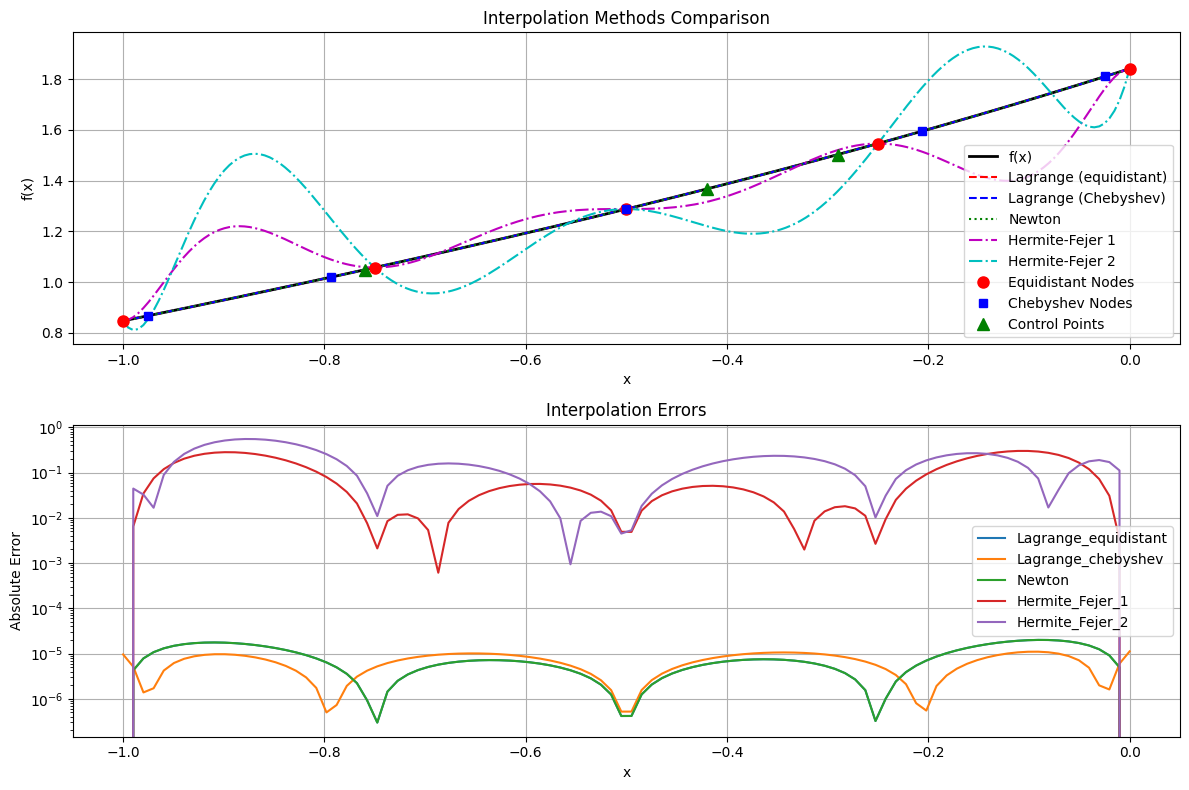


Visualization completed. The plot shows:
1. Top: Function and all interpolation methods
2. Bottom: Logarithmic error comparison


In [12]:

# =========================================================================
# VISUALIZATION
# =========================================================================
print("\n" + "=" * 70)
print("VISUALIZATION")
print("=" * 70)

# Create plot
x_vals = np.linspace(a, b, 200)
f_vals = [float(f.subs(x, val)) for val in x_vals]
L5_eq_vals = [float(L5_equidistant.subs(x, val)) for val in x_vals]
L5_ch_vals = [float(L5_chebyshev.subs(x, val)) for val in x_vals]
newton_vals = [float(newton_poly.subs(x, val)) for val in x_vals]
hf1_vals = [float(HF1_poly.subs(x, val)) for val in x_vals]
hf2_vals = [float(HF2_poly.subs(x, val)) for val in x_vals]

plt.figure(figsize=(12, 8))

# Plot functions
plt.subplot(2, 1, 1)
plt.plot(x_vals, f_vals, 'k-', linewidth=2, label='f(x)')
plt.plot(x_vals, L5_eq_vals, 'r--', label='Lagrange (equidistant)')
plt.plot(x_vals, L5_ch_vals, 'b--', label='Lagrange (Chebyshev)')
plt.plot(x_vals, newton_vals, 'g:', label='Newton')
plt.plot(x_vals, hf1_vals, 'm-.', label='Hermite-Fejer 1')
plt.plot(x_vals, hf2_vals, 'c-.', label='Hermite-Fejer 2')

# Mark nodes and control points
plt.plot(nodes_equidistant, [float(f.subs(x, node)) for node in nodes_equidistant],
         'ro', markersize=8, label='Equidistant Nodes')
plt.plot(nodes_chebyshev, [float(f.subs(x, node)) for node in nodes_chebyshev],
         'bs', markersize=6, label='Chebyshev Nodes')
plt.plot(control_points, [float(f.subs(x, cp)) for cp in control_points],
         'g^', markersize=8, label='Control Points')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Interpolation Methods Comparison')
plt.legend()
plt.grid(True)

# Plot errors
plt.subplot(2, 1, 2)
for method, error_list in errors.items():
    plt.plot(test_points, error_list, label=method)

plt.xlabel('x')
plt.ylabel('Absolute Error')
plt.title('Interpolation Errors')
plt.legend()
plt.grid(True)
plt.yscale('log')

plt.tight_layout()
plt.show()

print("\nVisualization completed. The plot shows:")
print("1. Top: Function and all interpolation methods")
print("2. Bottom: Logarithmic error comparison")